In [1]:
from datetime import datetime
import pandas as pd
import re
sales_data = pd.read_excel('Data files for UniMelb Project - data until 2021/Sales Data.xlsx')
stateless_data = pd.read_excel('Data files for UniMelb Project - data until 2021/stateless.xlsx')

In [2]:
act = pd.read_excel('Data files for UniMelb Project - data until 2021/act.xlsx')
nsw = pd.read_excel('Data files for UniMelb Project - data until 2021/nsw.xlsx')
nt = pd.read_excel('Data files for UniMelb Project - data until 2021/nt.xlsx')
qld = pd.read_excel('Data files for UniMelb Project - data until 2021/qld.xlsx')
sa = pd.read_excel('Data files for UniMelb Project - data until 2021/sa.xlsx')
tas = pd.read_excel('Data files for UniMelb Project - data until 2021/tas.xlsx')
vic = pd.read_excel('Data files for UniMelb Project - data until 2021/vic.xlsx')
wa = pd.read_excel('Data files for UniMelb Project - data until 2021/wa.xlsx')

In [3]:
sales_data.head()

,Sold-To Party,Name 1,Material,Description,Delivery Date,Confirmed Quantity,Sales Unit,Plant,Ship-To Party,Ship-to party name 1
0,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2021-02-01,8.0,DRM,S106,64679,WIRRINA WTP
1,11611,Trility Pty Ltd,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-12-21,4.0,DRM,S106,57395,Birdwood WWTP
2,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-12-18,8.0,DRM,S106,64679,WIRRINA WTP
3,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-11-12,8.0,DRM,S106,64679,WIRRINA WTP
4,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-11-12,6.0,DRM,S106,64679,WIRRINA WTP


In [4]:
# Covert data type
sales_data['Sold-To Party']= sales_data['Sold-To Party'].astype(str)
sales_data['Sold-To Party']= sales_data['Sold-To Party'].astype(str)

In [5]:
# Collecting stateless corps
stateless_corp = []
for i in stateless_data['SH_Customer No']:
    stateless_corp.append(i)

In [6]:
# Drop data with 0 confirmed quantity and corps which are not in Australia
sales_data = sales_data.drop(sales_data[sales_data['Confirmed Quantity']==0].index) 
sales_data = sales_data.drop(sales_data[sales_data['Sold-To Party'].isin(stateless_corp)].index)

In [7]:
sales_data['Quantity in L'] = 'undefined' # Initialise 

In [8]:
sales_data.head()

,Sold-To Party,Name 1,Material,Description,Delivery Date,Confirmed Quantity,Sales Unit,Plant,Ship-To Party,Ship-to party name 1,Quantity in L
0,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2021-02-01,8.0,DRM,S106,64679,WIRRINA WTP,undefined
1,11611,Trility Pty Ltd,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-12-21,4.0,DRM,S106,57395,Birdwood WWTP,undefined
2,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-12-18,8.0,DRM,S106,64679,WIRRINA WTP,undefined
3,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-11-12,8.0,DRM,S106,64679,WIRRINA WTP,undefined
4,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-11-12,6.0,DRM,S106,64679,WIRRINA WTP,undefined


In [9]:
#Convert KG into TO
sales_data.loc[sales_data['Sales Unit']=='KG', 'Confirmed Quantity'] = sales_data['Confirmed Quantity']/1000
sales_data.loc[sales_data['Sales Unit']=='KG', 'Sales Unit'] = 'TO'

In [10]:
#Convert all units into L
sales_data.loc[sales_data['Sales Unit']=='DRM', 'Quantity in L'] = sales_data['Confirmed Quantity']*200
sales_data.loc[sales_data['Sales Unit']=='BOX', 'Quantity in L'] = sales_data['Confirmed Quantity']*1000
sales_data.loc[sales_data['Sales Unit']=='PLY', 'Quantity in L'] = sales_data['Confirmed Quantity']*15
sales_data.loc[sales_data['Sales Unit']=='IBC', 'Quantity in L'] = sales_data['Confirmed Quantity']*1000
sales_data.loc[sales_data['Sales Unit']=='KL', 'Quantity in L'] = sales_data['Confirmed Quantity']*1000
sales_data.loc[sales_data['Sales Unit']=='L', 'Quantity in L'] = sales_data['Confirmed Quantity']*1
sales_data.loc[(sales_data['Sales Unit']=='PLS') & (sales_data['Material'].str.contains('MHL-22.5PAIL')), 'Quantity in L'] = sales_data['Confirmed Quantity']*15
sales_data.loc[(sales_data['Sales Unit']=='PLS') & (sales_data['Material'].str.contains('PAC23-15')), 'Quantity in L'] = sales_data['Confirmed Quantity']*15
sales_data.loc[(sales_data['Sales Unit']=='PLS') & (sales_data['Material'].str.contains('SODHYP12PM-12.5')), 'Quantity in L'] = sales_data['Confirmed Quantity']*12.5
sales_data.loc[(sales_data['Sales Unit']=='PLS') & (sales_data['Material'].str.contains('SODHYP12PM-15')), 'Quantity in L'] = sales_data['Confirmed Quantity']*15
sales_data.loc[(sales_data['Sales Unit']=='TO') & (sales_data['Material'].str.contains('ALUSUL08')), 'Quantity in L'] = sales_data['Confirmed Quantity']*(1000/1.31)
sales_data.loc[(sales_data['Sales Unit']=='TO') & (sales_data['Material'].str.contains('MHL')), 'Quantity in L'] = sales_data['Confirmed Quantity']*(1000/1.5)
sales_data.loc[(sales_data['Sales Unit']=='TO') & (sales_data['Material'].str.contains('PAC10')), 'Quantity in L'] = sales_data['Confirmed Quantity']*(1000/1.19)
sales_data.loc[(sales_data['Sales Unit']=='TO') & (sales_data['Material'].str.contains('PAC23')), 'Quantity in L'] = sales_data['Confirmed Quantity']*(1000/1.34)
sales_data.loc[(sales_data['Sales Unit']=='TO') & (sales_data['Material'].str.contains('SODHYP')), 'Quantity in L'] = sales_data['Confirmed Quantity']*(1000/1.2)

In [11]:
sales_data['Delivery Date'] = sales_data['Delivery Date'].dt.strftime('%Y-%m')

In [12]:
sales_data

,Sold-To Party,Name 1,Material,Description,Delivery Date,Confirmed Quantity,Sales Unit,Plant,Ship-To Party,Ship-to party name 1,Quantity in L
0,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2021-02,8.0,DRM,S106,64679,WIRRINA WTP,1600
1,11611,Trility Pty Ltd,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-12,4.0,DRM,S106,57395,Birdwood WWTP,800
2,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-12,8.0,DRM,S106,64679,WIRRINA WTP,1600
3,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-11,8.0,DRM,S106,64679,WIRRINA WTP,1600
4,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-11,6.0,DRM,S106,64679,WIRRINA WTP,1200
...,...,...,...,...,...,...,...,...,...,...,...
228427,7650,Bartter Enterprises,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-12,1615.0,L,N106,37418,CHICKEN PLANT-- Steggles /Bartter,1615
228428,6190,YMCA Singleton Swim & Fitness,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-12,1650.0,L,N106,6190,YMCA Singleton Swim & Fitness,1650
228429,8029,Paper Australia Pty Ltd,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-11,1100.0,L,V127,40241,AP Maryvale Mill - Cooling Towers,1100
228430,7650,Bartter Enterprises,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-01,839.0,L,N106,37417,TURKEY PLANT- Steggles /Bartter,839


In [13]:
sales_data[sales_data['Sales Unit'] == 'KL']

,Sold-To Party,Name 1,Material,Description,Delivery Date,Confirmed Quantity,Sales Unit,Plant,Ship-To Party,Ship-to party name 1,Quantity in L
120029,54190,Redox Pty Ltd - Giraween,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2019-06,21.0800,KL,N106,18126,OWN CARTAGE Redox Giraween,21080
121044,54190,Redox Pty Ltd - Giraween,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2019-05,20.0080,KL,N106,18126,OWN CARTAGE Redox Giraween,20008
121653,28404,Pental Products,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2019-04,21.2994,KL,V116,28404,Pental Products,21299.4


In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
grouped_sales_data = sales_data.groupby(['Material', 'Delivery Date'])['Quantity in L'].sum().reset_index()
grouped_sales_data

,Material,Delivery Date,Quantity in L
0,ALUSUL08-1000,2010-01,16000.000
1,ALUSUL08-1000,2010-02,11000.000
2,ALUSUL08-1000,2010-03,26000.000
3,ALUSUL08-1000,2010-04,45000.000
4,ALUSUL08-1000,2010-05,25977.099
...,...,...,...
4142,SODHYP5-B,2020-12,4073.000
4143,SODHYP5-B,2021-01,3775.000
4144,SODHYP5-B,2021-02,3343.000
4145,SODHYP5-B,2021-03,3987.000


In [15]:
grouped_sales_data.to_csv('grouped sales data.csv', index=False)

In [16]:
grouped_sales_data[grouped_sales_data['Delivery Date'] == '2019-04']

,Material,Delivery Date,Quantity in L
111,ALUSUL08-1000,2019-04,39740.458
150,ALUSUL08-1000NR,2019-04,10988.550
338,ALUSUL08-B,2019-04,2962774.809
474,ALUSUL08-FILT,2019-04,91603.053
559,ALUSUL08-FP4,2019-04,91603.053
696,ALUSUL08-M123,2019-04,282442.748
833,ALUSUL08-M4,2019-04,458015.267
953,ALUSUL08-M5,2019-04,91603.053
1090,ALUSUL08-PRI,2019-04,190839.695
1227,ALUSUL08-SEC,2019-04,251908.397


# give the state inform for each records

In [17]:
# len(set(sales_data['Sold-To Party'].tolist()))

In [18]:
# sales_data['state of Sold-To Party'] = 'undefined' # Initialise 

In [19]:
sales_data

,Sold-To Party,Name 1,Material,Description,Delivery Date,Confirmed Quantity,Sales Unit,Plant,Ship-To Party,Ship-to party name 1,Quantity in L
0,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2021-02,8.000,DRM,S106,64679,WIRRINA WTP,1600.000
1,11611,Trility Pty Ltd,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-12,4.000,DRM,S106,57395,Birdwood WWTP,800.000
2,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-12,8.000,DRM,S106,64679,WIRRINA WTP,1600.000
3,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-11,8.000,DRM,S106,64679,WIRRINA WTP,1600.000
4,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-11,6.000,DRM,S106,64679,WIRRINA WTP,1200.000
...,...,...,...,...,...,...,...,...,...,...,...
228427,7650,Bartter Enterprises,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-12,1615.000,L,N106,37418,CHICKEN PLANT-- Steggles /Bartter,1615.000
228428,6190,YMCA Singleton Swim & Fitness,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-12,1650.000,L,N106,6190,YMCA Singleton Swim & Fitness,1650.000
228429,8029,Paper Australia Pty Ltd,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-11,1100.000,L,V127,40241,AP Maryvale Mill - Cooling Towers,1100.000
228430,7650,Bartter Enterprises,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-01,839.000,L,N106,37417,TURKEY PLANT- Steggles /Bartter,839.000


In [20]:
act['state'] = 'act'
act = act[['SH_Customer No', 'state']]
nsw['state'] = 'nsw'
nsw = nsw[['SH_Customer No', 'state']]
nt['state'] = 'nt'
nt = nt[['SH_Customer No', 'state']]
qld['state'] = 'qld'
qld = qld[['SH_Customer No', 'state']]
sa['state'] = 'sa'
sa = sa[['SH_Customer No', 'state']]
tas['state'] = 'tas'
tas = tas[['SH_Customer No', 'state']]
vic['state'] = 'vic'
vic = vic[['SH_Customer No', 'state']]
wa['state'] = 'wa'
wa = wa[['SH_Customer No', 'state']]

In [21]:
union = [act,nsw,nt,qld,sa,tas,vic,wa]
states_union = pd.concat(union)
states_union

,SH_Customer No,state
0,5780,act
1,5795,act
2,5796,act
3,5797,act
4,5798,act
...,...,...
3301,W323,wa
3302,W324,wa
3303,W381,wa
3304,W382,wa


In [22]:
merged_table = pd.merge(sales_data, states_union,how='left',left_on='Sold-To Party',right_on='SH_Customer No')
merged_table

,Sold-To Party,Name 1,Material,Description,Delivery Date,Confirmed Quantity,Sales Unit,Plant,Ship-To Party,Ship-to party name 1,Quantity in L,SH_Customer No,state
0,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2021-02,8.000,DRM,S106,64679,WIRRINA WTP,1600.000,9477,sa
1,11611,Trility Pty Ltd,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-12,4.000,DRM,S106,57395,Birdwood WWTP,800.000,11611,sa
2,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-12,8.000,DRM,S106,64679,WIRRINA WTP,1600.000,9477,sa
3,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-11,8.000,DRM,S106,64679,WIRRINA WTP,1600.000,9477,sa
4,9477,SA Water Corporation,ALUSUL08-200,"ALUMINIUM SULFATE LIQUID, 200L drum",2020-11,6.000,DRM,S106,64679,WIRRINA WTP,1200.000,9477,sa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224897,7650,Bartter Enterprises,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-12,1615.000,L,N106,37418,CHICKEN PLANT-- Steggles /Bartter,1615.000,7650,nsw
224898,6190,YMCA Singleton Swim & Fitness,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-12,1650.000,L,N106,6190,YMCA Singleton Swim & Fitness,1650.000,6190,nsw
224899,8029,Paper Australia Pty Ltd,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-11,1100.000,L,V127,40241,AP Maryvale Mill - Cooling Towers,1100.000,8029,vic
224900,7650,Bartter Enterprises,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-01,839.000,L,N106,37417,TURKEY PLANT- Steggles /Bartter,839.000,7650,nsw


In [23]:
# new_customers = merged_table.sort_values(['Delivery Date']).groupby('Sold-To Party')
new_customers = merged_table.sort_values(['Delivery Date']).groupby('Sold-To Party').head(1)
new_customers

,Sold-To Party,Name 1,Material,Description,Delivery Date,Confirmed Quantity,Sales Unit,Plant,Ship-To Party,Ship-to party name 1,Quantity in L,SH_Customer No,state
224901,7650,Bartter Enterprises,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-01,839.000,L,N106,37417,TURKEY PLANT- Steggles /Bartter,839.000,7650,nsw
224899,8029,Paper Australia Pty Ltd,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-11,1100.000,L,V127,40241,AP Maryvale Mill - Cooling Towers,1100.000,8029,vic
224887,2509,Campaspe Shire Council,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-12,1700.000,L,V218,2511,Stanhope Pool,1700.000,2509,vic
224888,2719,Murchison Swimming Pool,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-12,1000.000,L,V218,2720,Murchison Swimming Pool,1000.000,2719,vic
224890,28984,Orica Australia - Kooragang Island,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2009-12,1846.000,L,N106,38375,NAP 1 - Orica Explosives (KI),1846.000,28984,nsw
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88589,8011,Ixom Operations Pty Ltd,SODHYP13-15,SODIUM HYPOCHLORITE 13%- 15L,2021-03,12.000,PLY,V305,48211,MIEX - Deer Park,180.000,8011,vic
48049,66599,Chemology Pty Ltd,PAC23-1330NR,PAC 23 SOLUTION - 1330KG IBC NR,2021-03,2.000,BOX,S315,66599,Chemology Pty Ltd,2000.000,NaN,NaN
95221,62404,Intech Chemicals Pty Ltd,SODHYP13-IBCSTNR,Sodium Hypochlorite 13% 1000L Non-Return,2021-03,1.000,BOX,N106,62404,Intech Chemicals Pty Ltd,1000.000,62404,nsw
99989,66546,Splashs Pakenham Pty Ltd,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2021-03,1000.000,L,V116,66552,Splashs Pakenham,1000.000,NaN,NaN


In [24]:
new_customers = new_customers[(new_customers['Delivery Date'] > '2015-01-01')]
new_customers

,Sold-To Party,Name 1,Material,Description,Delivery Date,Confirmed Quantity,Sales Unit,Plant,Ship-To Party,Ship-to party name 1,Quantity in L,SH_Customer No,state
167718,1826,City Of Maribyrnong,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2015-02,3000.000,L,V116,1826,City Of Maribyrnong,3000.000,1826,vic
93560,1435,Tandex Pty Ltd,SODHYP13-1000BB,SODIUM HYPOCHLORITE 13% - 1000L IBC,2015-02,1.000,BOX,V218,1435,Tandex Pty Ltd,1000.000,1435,vic
91917,57787,IDT Australia Limited,SODHYP13-200,SODIUM HYPOCHLORITE 13% - 200l,2015-02,2.000,DRM,V305,57787,IDT Australia Limited,400.000,57787,vic
69167,57943,Cooinda Lodge Kakadu,SODHYP12.5-200,SODIUM HYPOCHLORITE 12.5% (200 Lt Drum),2015-02,4.000,DRM,D106,57943,Cooinda Lodge Kakadu,800.000,57943,nt
168645,58315,Community Association DP No 270215,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2015-02,1000.000,L,N106,58319,The Glass house,1000.000,58315,nsw
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88589,8011,Ixom Operations Pty Ltd,SODHYP13-15,SODIUM HYPOCHLORITE 13%- 15L,2021-03,12.000,PLY,V305,48211,MIEX - Deer Park,180.000,8011,vic
48049,66599,Chemology Pty Ltd,PAC23-1330NR,PAC 23 SOLUTION - 1330KG IBC NR,2021-03,2.000,BOX,S315,66599,Chemology Pty Ltd,2000.000,NaN,NaN
95221,62404,Intech Chemicals Pty Ltd,SODHYP13-IBCSTNR,Sodium Hypochlorite 13% 1000L Non-Return,2021-03,1.000,BOX,N106,62404,Intech Chemicals Pty Ltd,1000.000,62404,nsw
99989,66546,Splashs Pakenham Pty Ltd,SODHYP13-B,SODIUM HYPOCHLORITE 13% - BULK,2021-03,1000.000,L,V116,66552,Splashs Pakenham,1000.000,NaN,NaN


In [25]:
visual = pd.DataFrame(data=new_customers['Delivery Date'].value_counts().reset_index().sort_values(['index']))
visual = visual.rename(columns={"index": "Delivery Date", "Delivery Date": "Counts"})
visual
visual.to_csv('Data files for UniMelb Project - data until 2021/new customers.csv')

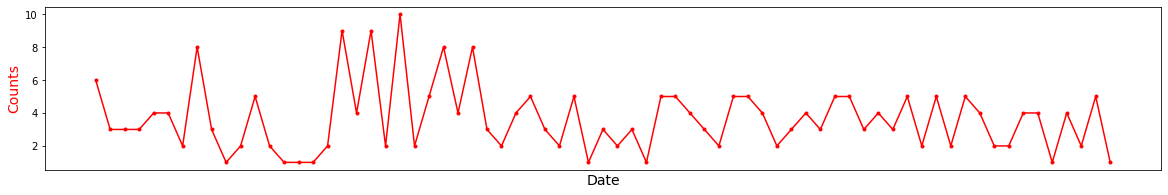

In [34]:
import matplotlib.pyplot as plt

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(visual['Delivery Date'], visual['Counts'], color="red", marker=".")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Counts",color="red",fontsize=14)
plt.rcParams["figure.figsize"] = (20,3)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

# product categories

In [27]:
ALUSUL08_sale = merged_table.loc[merged_table['Material'].str.contains('ALUSUL08')]
PAC23_sale = merged_table.loc[merged_table['Material'].str.contains('PAC23')]
PAC10LB_sale = merged_table.loc[merged_table['Material'].str.contains('PAC10LB')]

# Sale of ALUSUL08 in 7 states

In [28]:
#ALUSUL08_sale
#{'international', 'nsw', 'nt', 'qld', 'sa', 'tas', 'vic', 'wa'}
#没有act
ALUSUL08_sale_nsw = ALUSUL08_sale.loc[ALUSUL08_sale['state']=='nsw']
ALUSUL08_sale_nt = ALUSUL08_sale.loc[ALUSUL08_sale['state']=='nt']
ALUSUL08_sale_qld = ALUSUL08_sale.loc[ALUSUL08_sale['state']=='qld']
ALUSUL08_sale_sa = ALUSUL08_sale.loc[ALUSUL08_sale['state']=='sa']
ALUSUL08_sale_tas = ALUSUL08_sale.loc[ALUSUL08_sale['state']=='tas']
ALUSUL08_sale_vic = ALUSUL08_sale.loc[ALUSUL08_sale['state']=='vic']
ALUSUL08_sale_wa = ALUSUL08_sale.loc[ALUSUL08_sale['state']=='wa']

In [29]:
ALUSUL08_sale_nsw.to_csv('data_state_product/ALUSUL08_sale_nsw.csv')
ALUSUL08_sale_nt.to_csv('data_state_product/ALUSUL08_sale_nt.csv')
ALUSUL08_sale_qld.to_csv('data_state_product/ALUSUL08_sale_qld.csv')
ALUSUL08_sale_sa.to_csv('data_state_product/ALUSUL08_sale_sa.csv')
ALUSUL08_sale_tas.to_csv('data_state_product/ALUSUL08_sale_tas.csv')
ALUSUL08_sale_vic.to_csv('data_state_product/ALUSUL08_sale_vic.csv')
ALUSUL08_sale_wa.to_csv('data_state_product/ALUSUL08_sale_wa.csv')

# Sale of PAC23 in 8 states

In [30]:
#PAC23
#{'international', 'nsw', 'nt', 'qld', 'sa', 'tas', 'vic', 'wa'}
#没有act
PAC23_sale_nsw = PAC23_sale.loc[PAC23_sale['state']=='nsw']
PAC23_sale_nt = PAC23_sale.loc[PAC23_sale['state']=='nt']
PAC23_sale_qld = PAC23_sale.loc[PAC23_sale['state']=='qld']
PAC23_sale_sa = PAC23_sale.loc[PAC23_sale['state']=='sa']
PAC23_sale_tas = PAC23_sale.loc[PAC23_sale['state']=='tas']
PAC23_sale_vic = PAC23_sale.loc[PAC23_sale['state']=='vic']
PAC23_sale_wa = PAC23_sale.loc[PAC23_sale['state']=='wa']

In [31]:
PAC23_sale_nsw.to_csv('data_state_product/PAC23_sale_nsw.csv')
PAC23_sale_nt.to_csv('data_state_product/PAC23_sale_nt.csv')
PAC23_sale_qld.to_csv('data_state_product/PAC23_sale_qld.csv')
PAC23_sale_sa.to_csv('data_state_product/PAC23_sale_sa.csv')
PAC23_sale_tas.to_csv('data_state_product/PAC23_sale_tas.csv')
PAC23_sale_vic.to_csv('data_state_product/PAC23_sale_vic.csv')
PAC23_sale_wa.to_csv('data_state_product/PAC23_sale_wa.csv')

# Sale of PAC10LB in 8 states

In [32]:
#PAC10LB
#{'act', 'nsw', 'qld', 'sa', 'tas', 'vic', 'wa'}
PAC10LB_sale_act = PAC10LB_sale.loc[PAC10LB_sale['state']=='act']
PAC10LB_sale_nsw = PAC10LB_sale.loc[PAC10LB_sale['state']=='nsw']
PAC10LB_sale_nt = PAC10LB_sale.loc[PAC10LB_sale['state']=='nt']
PAC10LB_sale_qld = PAC10LB_sale.loc[PAC10LB_sale['state']=='qld']
PAC10LB_sale_sa = PAC10LB_sale.loc[PAC10LB_sale['state']=='sa']
PAC10LB_sale_tas = PAC10LB_sale.loc[PAC10LB_sale['state']=='tas']
PAC10LB_sale_vic = PAC10LB_sale.loc[PAC10LB_sale['state']=='vic']
PAC10LB_sale_wa = PAC10LB_sale.loc[PAC10LB_sale['state']=='wa']

In [33]:
PAC10LB_sale_nsw.to_csv('data_state_product/PAC10LB_sale_nsw.csv')
PAC10LB_sale_nt.to_csv('data_state_product/PAC10LB_sale_nt.csv')
PAC10LB_sale_qld.to_csv('data_state_product/PAC10LB_sale_qld.csv')
PAC10LB_sale_sa.to_csv('data_state_product/PAC10LB_sale_sa.csv')
PAC10LB_sale_tas.to_csv('data_state_product/PAC10LB_sale_tas.csv')
PAC10LB_sale_vic.to_csv('data_state_product/PAC10LB_sale_vic.csv')
PAC10LB_sale_wa.to_csv('data_state_product/PAC10LB_sale_wa.csv')